In [74]:
from minisom import MiniSom    
from sklearn.cluster import KMeans
import numpy as np
#data = np.genfromtxt('iris.csv', delimiter=',', usecols=(0, 1, 2, 3))

data_point_size = 10
data = np.genfromtxt('10clusters.vec', skip_header=4, usecols=list(range(data_point_size)))
#data = np.genfromtxt('chainlink.vec', skip_header=4, usecols=list(range(3)))
# data normalization

data = np.apply_along_axis(lambda x: x/np.linalg.norm(x), 1, data)

# Initialization and training
d1 = 15
d2 = 15
som = MiniSom(d1, d2, data_point_size, sigma=.3, learning_rate=0.5, neighborhood_function='gaussian', random_seed=2)

#som = MiniSom(d1, d2, data_point_size, sigma=3, learning_rate=0.5, 
#              neighborhood_function='triangle', random_seed=10)
#som.train_random(data,1000)

print("Training...")
print(som.quantization_error(data))
print(som.topographic_error(data))
som.pca_weights_init(data)
som.train_batch(data, 1000, verbose=True)  # random training

#som.neighborhood(som.winner(data[0]),2)

#som = MiniSom(3, 3, 4, sigma=0.3, learning_rate=0.5) # initialization of 6x6 SOM
#som.train_random(data, 100) # trains the SOM with 100 iterations


Training...
0.05704776936649882
1.0
 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.011028026094612016
 topographic error: 0.23058823529411765


In [100]:
def winners_labels(som,rweights,labels):
    winners_labels = np.zeros(shape=(d1,d2))
    for cnt, xx in enumerate (rweights):
        w = som.winner(xx)
        l = labels[cnt]
        winners_labels[w[0],w[1]] = l
    return winners_labels

In [4]:

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
%matplotlib inline
%load_ext autoreload

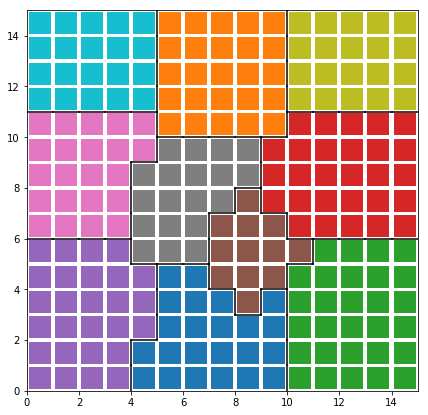

In [101]:

def plot_with_labelling(som, d1, d2, labels, coloring_labels, rweights, debug=False):

    plt.figure(figsize=(d1//2, d2//2))
    # Plotting the response for each pattern in the iris dataset
    #win_map = som.win_map(rweights)
    #plt.pcolor(som.distance_map().T, cmap='bone_r')  # plotting the distance map as background
    #plt.colorbar()
    # use different colors and markers for each label
    #markers = ['o', 's', 'D']
    colors = ['C' + str(i) for i in np.unique(coloring_labels)]
    win_labels = winners_labels(som,rweights,labels)

    for cnt, xx in enumerate(rweights):
        w = som.winner(xx)  # getting the winner
        #w = xx
        # palce a marker on the winning position for the sample xx
        plt.plot(w[0]+.5, w[1]+.5, 's', markerfacecolor=colors[coloring_labels[cnt]],
                markeredgecolor=colors[coloring_labels[cnt]], markersize=20, markeredgewidth=2)
    def plot_borders(debug=False):
        border_color = lambda c : c if debug else 'black'
        for i,row in enumerate(win_labels):
            for j,v in enumerate(row):
                if j < win_labels.shape[1]-1 and v != row[j+1]:
                    plt.plot([i,i+1],[j+1,j+1], color=border_color('red'))
                if i < win_labels.shape[0]-1 and v != win_labels[i+1][j]:
                    plt.plot([i+1,i+1],[j,j+1], color=border_color('blue'))    
    plot_borders(debug)
    plt.axis([0, d1, 0, d2])
    plt.show()

n_clusters = 10
rweights = som.get_weights().reshape(d1*d2,-1) # first argument is product of first two dimensions of the input dataset
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(rweights)
labels = kmeans.labels_
plot_with_labelling(som,d1,d2,labels,labels,rweights,debug=False)


In [0]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(data)
label = kmeans.labels_    
labels_map = som.labels_map(data, label)
label_names = np.unique(label)
plt.figure(figsize=(d1, d2))
the_grid = GridSpec(d1, d2)
for position in labels_map.keys():
    label_fracs = [labels_map[position][l] for l in label_names]
    plt.subplot(the_grid[position[0], position[1]], aspect=1)
    patches, texts = plt.pie(label_fracs)
plt.show()

In [0]:
plt.figure(figsize=(d1, d2))
frequencies = som.activation_response(data)
plt.pcolor(frequencies.T, cmap='Blues') 
plt.colorbar()
plt.show()

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 2 3 4
 5 0 0 0 0 0 0 0 0 0 0 0 6 3 5 5 7 0 0 0 0 0 0 0 0 0 0 8 3 3 5 0 0 0 0 0 0
 0 0 0 0 0 0 0 9 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 2. 3. 4. 5. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 6. 3. 5. 5. 7. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 8. 3. 3. 5. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 9. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 

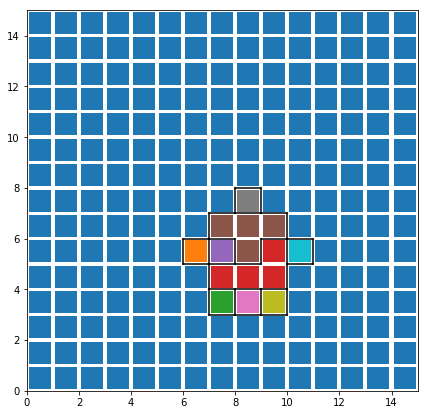

In [99]:
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster,cut_tree
from matplotlib import pyplot as plt
#X = np.genfromtxt('iris.csv', delimiter=',', usecols=(0, 1, 2, 3))



rweights = som.get_weights().reshape(d1*d2,-1)
Z = linkage(rweights, 'single')

cuttree= cut_tree(Z,n_clusters=[5,10])
#print(cuttree)
#C = fcluster(Z, t=10, criterion='maxclust')
#print(C)
coloring_labels = cuttree.T[0]
labels = cuttree.T[1]
print(labels)
plot_with_labelling(som,d1,d2,labels,coloring_labels,rweights,debug=False)

